In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
train_df = pd.read_csv('/content/customer_churn_dataset-training-master.csv')
test_df = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')

In [ ]:
train_df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


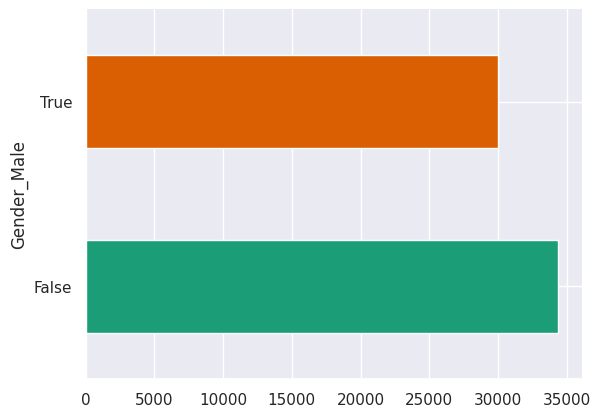

In [ ]:
# @title Gender_Male

from matplotlib import pyplot as plt
import seaborn as sns
train_df.groupby('Gender_Male').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
train_df.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [ ]:
test_df.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


<Axes: title={'center': 'Gender Distribution'}, xlabel='Gender', ylabel='count'>

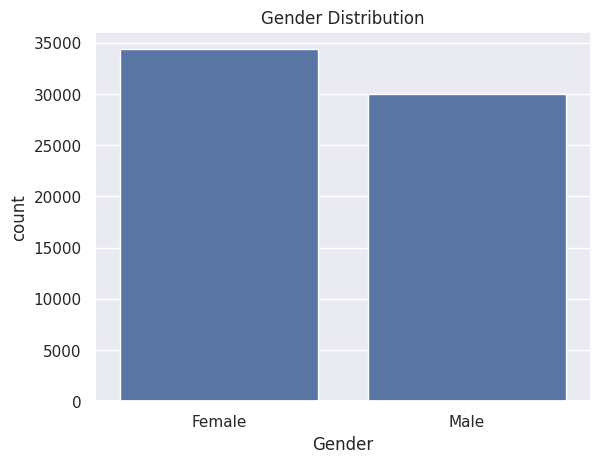

In [ ]:
sns.set()
plt.title('Gender Distribution')
sns.countplot(x='Gender',data=train_df)

<Axes: title={'center': 'Contract Length'}, xlabel='Contract Length', ylabel='count'>

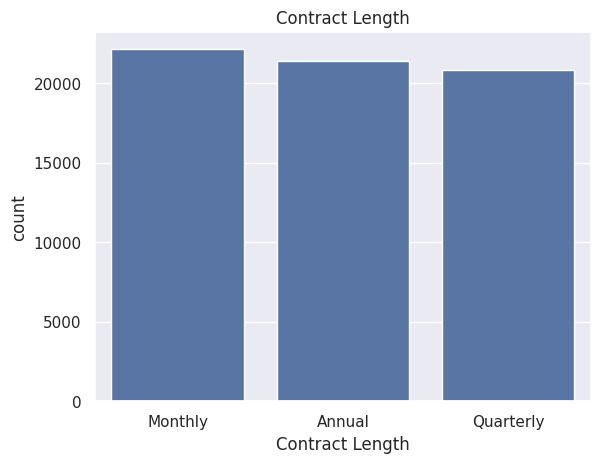

In [ ]:
plt.title('Contract Length')
sns.countplot(x='Contract Length',data=train_df)

<Axes: xlabel='Subscription Type', ylabel='count'>

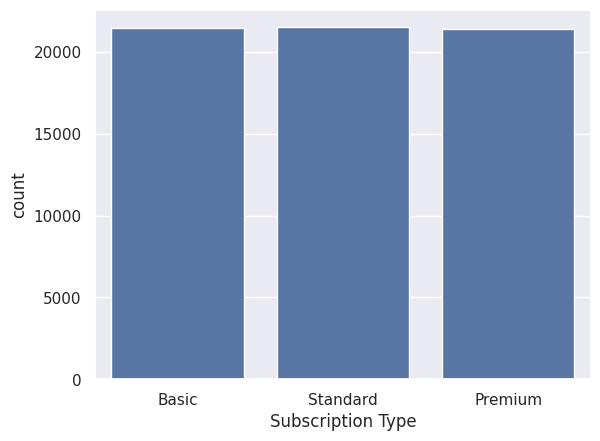

In [ ]:
sns.countplot(x='Subscription Type',data=train_df)

In [ ]:
train_df = pd.get_dummies(train_df, columns=['Gender', 'Subscription Type', 'Contract Length'], drop_first=True)

In [ ]:
train_df

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,1,22,25,14,4,27,598,9,1,False,False,False,True,False
1,2,41,28,28,7,13,584,20,0,False,False,True,True,False
2,3,47,27,10,2,29,757,21,0,True,True,False,False,False
3,4,35,9,12,5,17,232,18,0,True,True,False,False,True
4,5,53,58,24,9,2,533,18,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,33,12,6,21,947,14,1,False,False,False,False,True
64370,64371,37,6,1,5,22,923,9,1,True,False,True,False,False
64371,64372,25,39,14,8,30,327,20,1,True,True,False,True,False
64372,64373,50,18,19,7,22,540,13,1,False,False,True,True,False


In [ ]:
X = train_df.drop('Churn', axis=1)
y = train_df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

# Training

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=50, validation_split=0.3,callbacks=early_stopping)

Epoch 1/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8646 - loss: 0.3089 - val_accuracy: 0.9436 - val_loss: 0.1337
Epoch 2/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9475 - loss: 0.1225 - val_accuracy: 0.9588 - val_loss: 0.0952
Epoch 3/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9621 - loss: 0.0888 - val_accuracy: 0.9674 - val_loss: 0.0783
Epoch 4/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9718 - loss: 0.0662 - val_accuracy: 0.9729 - val_loss: 0.0655
Epoch 5/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9751 - loss: 0.0569 - val_accuracy: 0.9750 - val_loss: 0.0612
Epoch 6/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9789 - loss: 0.0512 - val_accuracy: 0.9784 - val_loss: 0.0529
Epoch 7/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9825 - loss: 0.0434 - val_accuracy: 0.9797 - val_loss: 0.0485
Epoch 8/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9847 - loss: 0.0376 - val_accu

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled,y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9919 - loss: 0.0299
Loss: 0.032640110701322556
Accuracy: 0.9902912378311157


In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5)

403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
score = accuracy_score(y_pred, y_test)
print(f'Accuracy: {score}')

Accuracy: 0.9902912621359223


# Now with Test Dataset

In [ ]:
test_df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [ ]:
test_df = pd.get_dummies(test_df, columns=['Gender', 'Subscription Type', 'Contract Length'], drop_first=True)

In [ ]:
test_df

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,1,22,25,14,4,27,598,9,1,False,False,False,True,False
1,2,41,28,28,7,13,584,20,0,False,False,True,True,False
2,3,47,27,10,2,29,757,21,0,True,True,False,False,False
3,4,35,9,12,5,17,232,18,0,True,True,False,False,True
4,5,53,58,24,9,2,533,18,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,33,12,6,21,947,14,1,False,False,False,False,True
64370,64371,37,6,1,5,22,923,9,1,True,False,True,False,False
64371,64372,25,39,14,8,30,327,20,1,True,True,False,True,False
64372,64373,50,18,19,7,22,540,13,1,False,False,True,True,False


In [ ]:
X_Test = test_df.drop('Churn', axis=1)
y_Test = test_df['Churn']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Test_scaled = scaler.fit_transform(X_Test)

In [ ]:
y_Test_pred = model.predict(X_Test_scaled)
y_Test_pred = (y_Test_pred > 0.5)

2012/2012 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


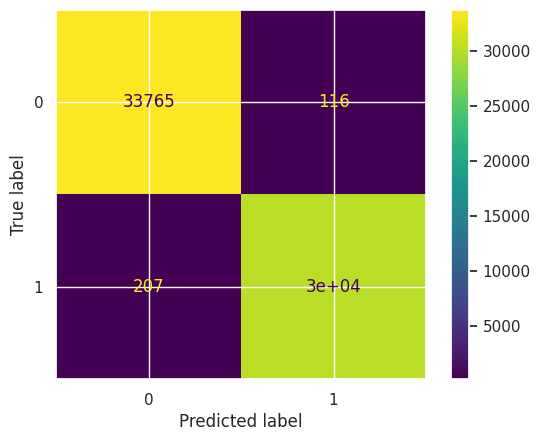

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_Test, y_Test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
test_score_accuracy = accuracy_score(y_Test_pred, y_Test)
print(f'Accuracy for Test Data: {test_score_accuracy}')

Accuracy for Test Data: 0.9949824463292634


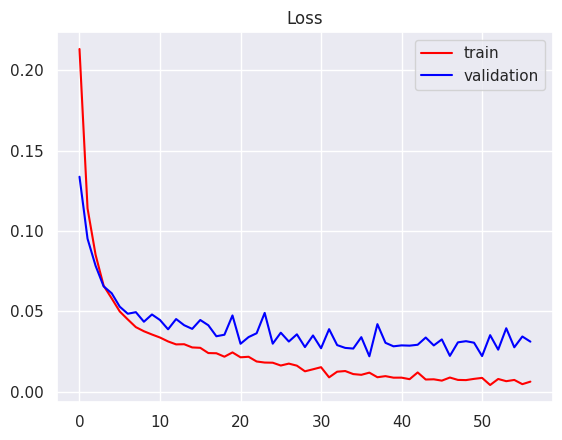

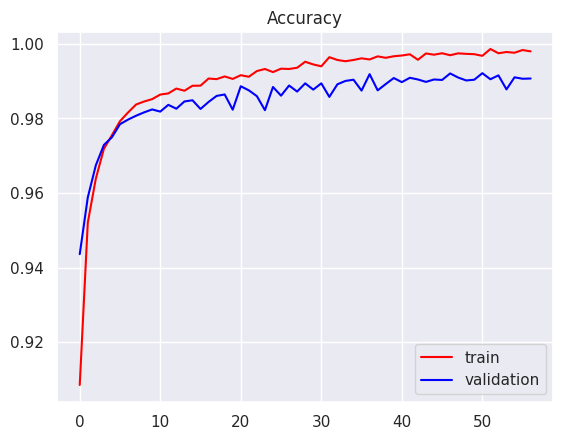

In [ ]:
# plotting accuracy and loss

# Loss
plt.title('Loss')
plt.plot(history.history['loss'],color='red',label='train') # traning data loss
plt.plot(history.history['val_loss'],color='blue',label='validation') # validation loss
plt.legend()
plt.show()

# Accuracy
plt.title('Accuracy')
plt.plot(history.history['accuracy'],color='red',label='train') # traning data accuracy
plt.plot(history.history['val_accuracy'],color='blue',label='validation') # validation accuracy
plt.legend()
plt.show()

# **Using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import plot_tree

rf_model = RandomForestClassifier(max_depth=20)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=20)

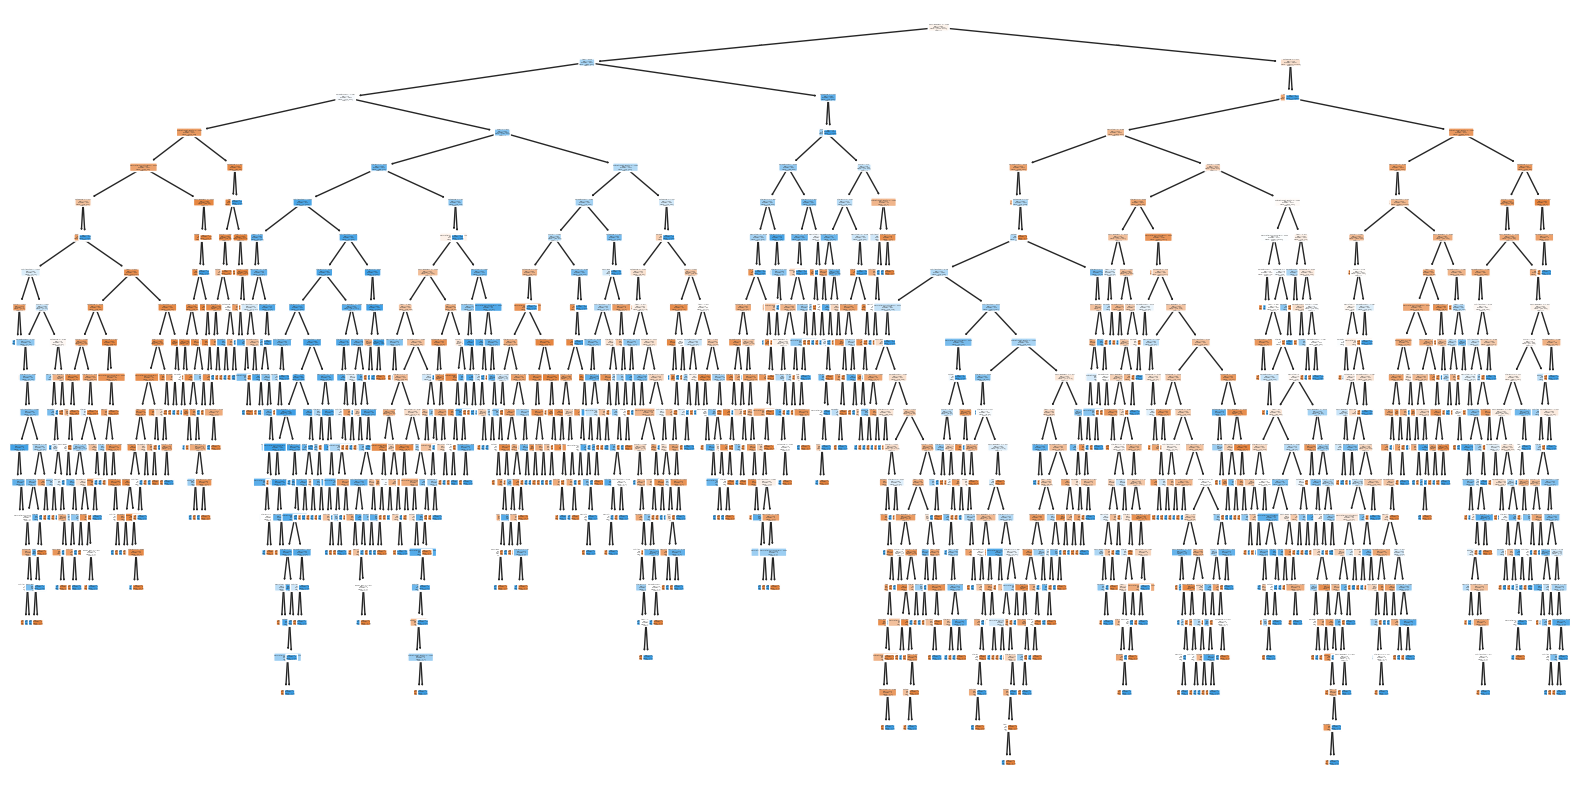

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0],
          feature_names=train_df.columns.tolist(),
          class_names=rf_model.classes_.astype(str),
          filled=True,
          rounded=True)
plt.show()

In [ ]:
y_pred_rf = rf_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
acc_rf = accuracy_score(y_pred_rf, y_test)*100
print(f'Accuracy for Random Forest: {acc_rf :.2f}')

Accuracy for Random Forest: 99.70


In [ ]:
y_pred_rf_test = rf_model.predict(X_Test_scaled)

In [ ]:
acc_rf_test = accuracy_score(y_pred_rf_test, y_Test)*100
print(f'Accuracy for Random Forest: {acc_rf_test :.2f}')

Accuracy for Random Forest: 99.94


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6793
           1       1.00      0.99      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



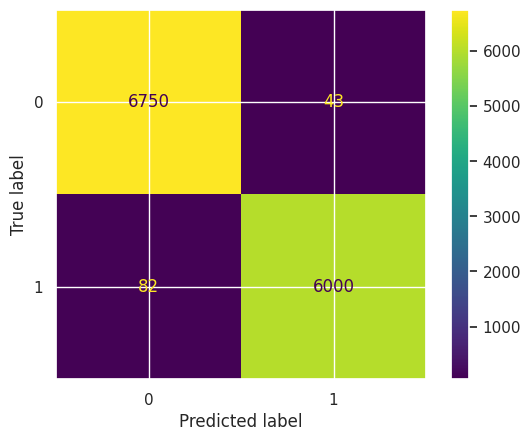

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

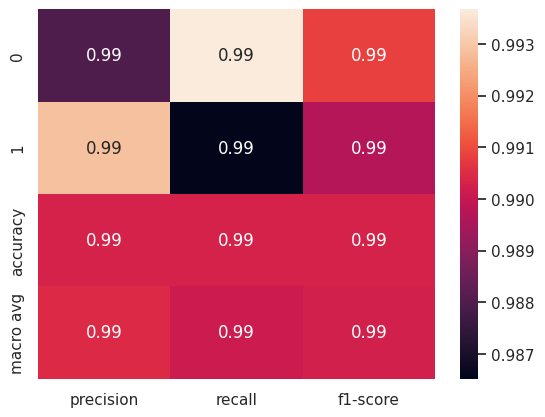

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df.iloc[:-1, :-1], annot=True)
plt.show()